### MNIST Handwritten Project

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
data = keras.datasets.mnist

In [5]:
# loading the dataset
(train_images,train_labels),(test_images,test_labels) = data.load_data()

In [6]:
#Normalize the images
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5 

In [7]:
# Flatten the images: Flatten the 28 * 28 images into a 784 dimensional vector to pass into the neural network
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
# building the model.

model = keras.Sequential([
    keras.layers.Dense(64,activation = 'relu',input_dim=784),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
#The loss function measures how well the model did on training,and then tries to improve on it.
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3484 - acc: 0.8957
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1739 - acc: 0.9472
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1353 - acc: 0.9580
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1146 - acc: 0.9646
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0993 - acc: 0.9692
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0912 - acc: 0.9716
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0814 - acc: 0.9741
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0751 - acc: 0.9758
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0709 - acc: 0.9773
Epoch 10/10
60000/60000 [==============================] - 5s 77us/sample - loss: 

In [11]:
# evaluating the Model
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('Tested Accuracy: ',test_acc)

10000/10000 - 1s - loss: 0.0943 - acc: 0.9716
Tested Accuracy:  0.9716


In [14]:
#make predictions
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])


[7 2 1 0 4]
[7 2 1 0 4]


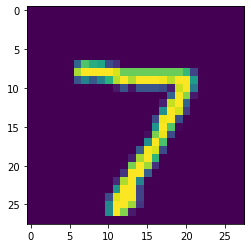

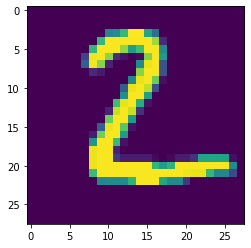

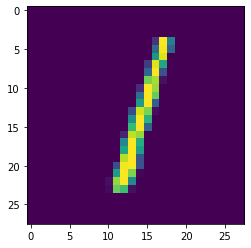

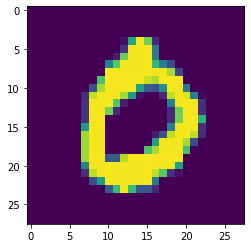

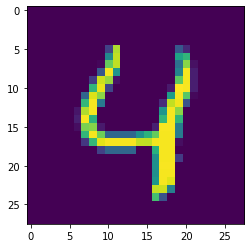

In [17]:
import matplotlib.pyplot as plt
for i in range(0,5):
    first_image = test_images[i]
    first_image = np.array(first_image,dtype= 'float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()
    